<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#T2-Measurements" data-toc-modified-id="T2-Measurements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>T2 Measurements</a></span></li><li><span><a href="#Other-T2-Measurements" data-toc-modified-id="Other-T2-Measurements-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Other T2 Measurements</a></span></li><li><span><a href="#T1-Measurements" data-toc-modified-id="T1-Measurements-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>T1 Measurements</a></span></li></ul></div>

In [183]:
%matplotlib notebook

import re
import sys
import os
#sys.path.insert(0, '../..')
#os.chdir('../../../')

#%matplotlib inline
#%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

plt.rcParams['figure.figsize'] = [16, 5]
plt.rcParams.update({'font.size': 22})

import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(15,6)}, font_scale=1.8)  
sns.set_style('whitegrid', {'font.family':'helvetica', 'font.serif':'Times New Roman'})
sns.set_palette("RdBu")

In [184]:
DIR = "week3/"

# Helper Functions

In [185]:
class fid:
    
    def __init__(self, DIR, filename, thresh=2.5):
        self.DIR = DIR
        self.filename = filename
        
        with open(DIR+filename, 'r') as f:
            data = f.readlines()
            data = np.array([line.strip().split('\t') for line in data])
            print(data[0])
            data = data[1:,:].astype(np.float64)
            data[data > thresh] = 0
            
        self.data = data

# T2 Measurements

12
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
-10.4047207847


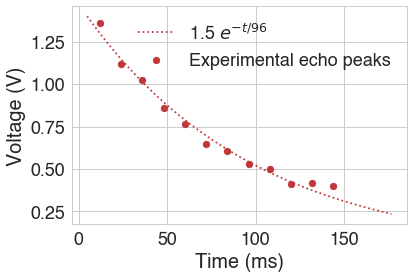

In [231]:
"""glycerol-t2-1.DAT"""

%matplotlib inline
t = np.array([0.012*i for i in range(1, 13)])
x = [1.361, 1.116, 1.022, 0.86, 0.767, 0.646, 0.604, 0.526, 0.497, 0.412, 0.418, 0.399]
d = [0.05/12*i for i in range(6,-6, -1)]
print(len(d))
#x = [x[i] + d[i] for i in range(0,12)]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, "glycerol-t2-1.DAT")
#plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
print(fit[0][1])
plt.scatter(1000*t, x, label="Experimental echo peaks")
plt.plot(1000*t2_fid.data[700:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[700:5000,0]), label="%.1f $e^{-t/%.f}$" %(fit[0][0], -1000/fit[0][1]), linestyle=":")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.legend()
#plt.title("glycerol-t2-1.DAT")
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


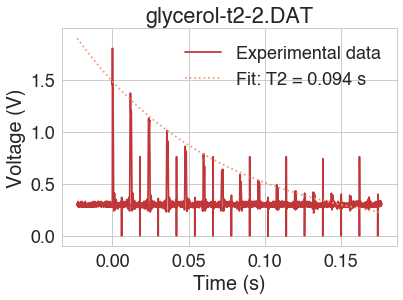

In [187]:
%matplotlib inline
t = [0.012*i for i in range(1, 13)]
x = [1.364, 1.128, 1.004, 0.854, 0.787, 0.638, 0.580, 0.521, 0.476, 0.423, 0.405, 0.392]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, "glycerol-t2-2.DAT")
plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[1:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[1:5000,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title("glycerol-t2-2.DAT")
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


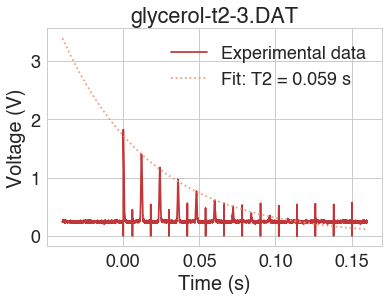

In [188]:
%matplotlib inline
filename = "glycerol-t2-3.DAT"
t = [0.012*i for i in range(1, 11)]
x = [1.385, 1.158, 0.959, 0.757, 0.6, 0.499, 0.37, 0.333, 0.3, 0.25]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=2)
plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[1:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[1:5000,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title(filename)
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


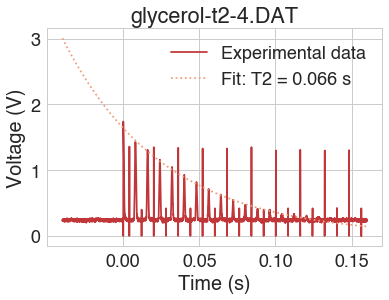

In [189]:
%matplotlib inline
filename = "glycerol-t2-4.DAT"
t = [0.00801*i for i in range(1, 14)]
x = [1.419, 1.297, 1.136, 1.029, 0.917, 0.813, 0.701, 0.621, 0.533,0.467, 0.4, 0.394, 0.326]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=2)
plt.plot(t2_fid.data[1:5000,0], t2_fid.data[1:5000,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[1:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[1:5000,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title(filename)
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


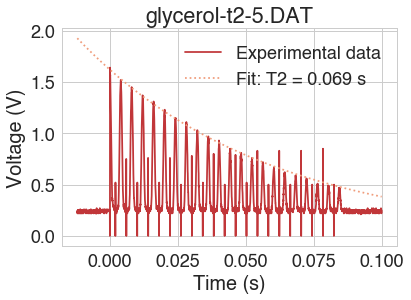

In [190]:
%matplotlib inline
filename = "glycerol-t2-5.DAT"
t = [0.00401*i for i in range(1, 14)]
x = [1.505, 1.446, 1.362, 1.302, 1.219, 1.148, 1.089, 1.016, 0.969, 0.921, 0.849, 0.801, 0.742]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=1.8)
plt.plot(t2_fid.data[700:3500,0], t2_fid.data[700:3500,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[700:3500,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[700:3500,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title(filename)
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


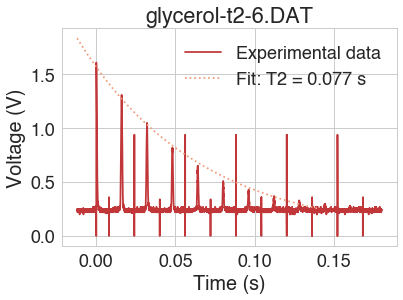

In [191]:
%matplotlib inline
filename = "glycerol-t2-6.DAT"
t = [0.01601*i for i in range(1, 11)]
x = [1.305, 1.048, 0.817, 0.646, 0.5, 0.414, 0.363, 0.329, 0.290, 0.270]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=1.8)
plt.plot(t2_fid.data[700:5500,0], t2_fid.data[700:5500,2], label="Experimental data")
#plt.scatter(t, x, label="Experimental data peaks")
plt.plot(t2_fid.data[700:4500,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[700:4500,0]), label="Fit: T2 = %.3f s" %(-1/fit[0][1]), linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title(filename)
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


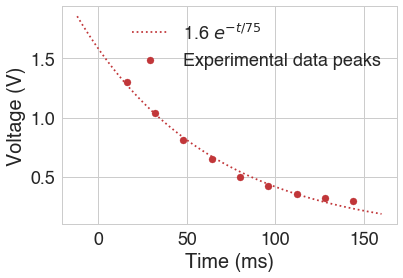

In [242]:
%matplotlib inline
filename = "glycerol-t2-6.DAT"
t = [0.01601*i for i in range(1, 10)]
x = [1.298, 1.038, 0.815, 0.650, 0.5, 0.425, 0.351, 0.323, 0.295]
fit = sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), t, x)
t2_fid = fid(DIR, filename, thresh=1.8)
#plt.plot(1000t2_fid.data[700:5500,0], t2_fid.data[700:5500,2], label="Experimental data")
plt.scatter(1000*np.array(t), x, label="Experimental data peaks")
plt.plot(1000*t2_fid.data[700:5000,0], fit[0][0]*np.exp(fit[0][1]*t2_fid.data[700:5000,0]), label="%.1f $e^{-t/%.f}$" %(fit[0][0], -1000/fit[0][1]), linestyle=":")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.legend()
#plt.title(filename)
plt.show()

# Other T2 Measurements

In [193]:
files = [
    "glycerol-t2-8.DAT", 
    "glycerol-t2-9.DAT",
    "glycerol-t2-10.DAT",
    "glycerol-t2-11.DAT",
    "glycerol-t2-12.DAT",
    "glycerol-t2-13.DAT",
    "glycerol-t2-14.DAT",
    "glycerol-t2-15.DAT"
]

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']
['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


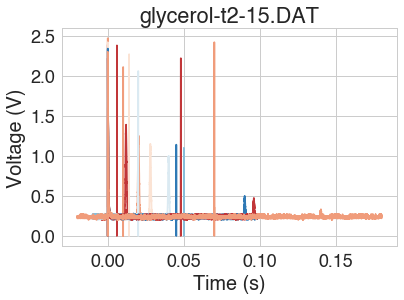

In [194]:
#%matplotlib inline
for filename in files:
    t2_fid = fid(DIR, filename)
    plt.plot(t2_fid.data[:,0], t2_fid.data[:,2], label="Experimental data")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
#plt.legend()
plt.title(filename)
plt.show()

# T1 Measurements

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


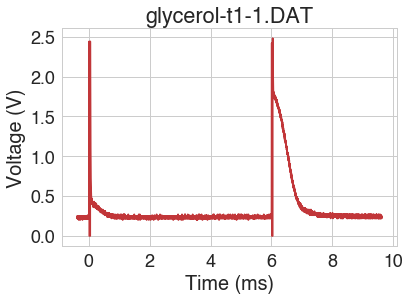

In [195]:
%matplotlib inline
filename = "glycerol-t1-1.DAT"
t2_fid = fid(DIR, filename)
plt.plot(1000*t2_fid.data[:,0], t2_fid.data[:,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
#plt.legend()
plt.title(filename)
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


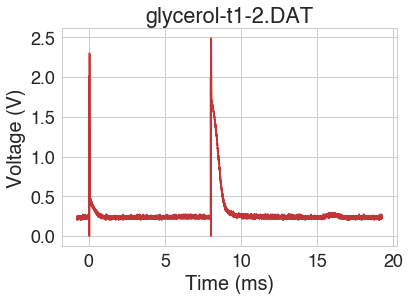

In [196]:
%matplotlib inline
filename = "glycerol-t1-2.DAT"
t2_fid = fid(DIR, filename)
plt.plot(1000*t2_fid.data[:,0], t2_fid.data[:,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
#plt.legend()
plt.title(filename)
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


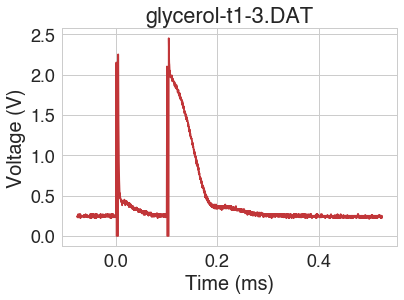

In [197]:
%matplotlib inline
filename = "glycerol-t1-3.DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
#plt.legend()
plt.title(filename)
plt.show()

['Time (S)' 'Ch1 Voltage (V)' 'Ch2 Voltage (V)']


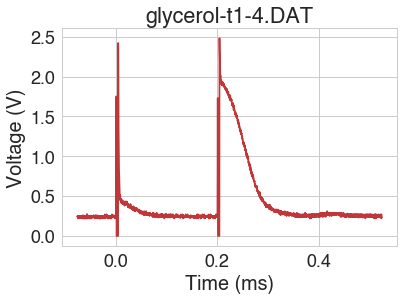

In [198]:
%matplotlib inline
filename = "glycerol-t1-4.DAT"
t2_fid = fid(DIR, filename)
plt.plot(100*t2_fid.data[:3000,0], t2_fid.data[:3000,2], label="Experimental data")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
#plt.legend()
plt.title(filename)
plt.show()

In [199]:
t = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0]
v = [-1.92, -1.87, -1.78, -1.73, -1.64, -1.52, -1.07]

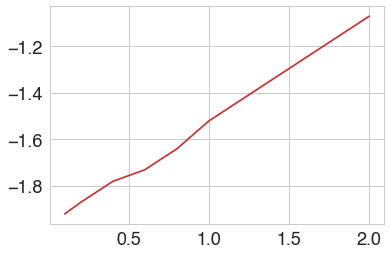

In [200]:
plt.plot(t, v)
plt.show()

50.1846971082


Text(0, 0.5, 'Voltage (V)')

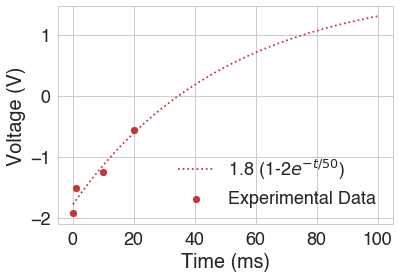

In [233]:
t = [0.1, 1, 10, 20]
x = [-1.92, -1.52, -1.25, -0.56]
fit = sp.optimize.curve_fit(lambda t,a,b: a*(1-2*np.exp(b*t)), t, x)
print(-1/fit[0][1])

plt.scatter(t, x, label="Experimental Data")
ar = np.array([0.1*i for i in range(1, 1000)])
plt.plot(ar, fit[0][0]*(1-2*np.exp(fit[0][1]*ar)),  label="%.1f (1-2$e^{-t/%.f}$)" %(fit[0][0], -1/fit[0][1]),linestyle=":")
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")